In [2]:
#Jupyter notebook to run the BC blues model and do some data analysis/visualization
#Import package=s
import time
import pandas as pd
import numpy as np
from BCBlues_1d import BCBlues_1d
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
#plt.style.use("ggplot")
#from data_1d import makeic

In [3]:
#Load data
from BCBlues_1d import BCBlues_1d #re-import to get changes
params = pd.read_excel('params_1d.xlsx',index_col = 0) 
locsumm = pd.read_excel('Oro_Loma.xlsx',index_col = 0) 
chemsumm = pd.read_excel('OPECHEMSUMM.xlsx',index_col = 0)
timeseries = pd.read_excel('timeseries_test2.xlsx')
numc = 8
pp = None
#Run model
test = BCBlues_1d(locsumm,chemsumm,params,8)
start = time.time()
res_t, res_time = test.run_it(locsumm,chemsumm,params,numc,pp,timeseries)

codetime = (time.time()-start)

In [38]:
#Load the model outputs from a pickle file
res_time = pd.read_pickle("res_time_181203.pkl")
res_time.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74336 entries, (0, EHDPP, 0) to (100, TPhP, 45)
Columns: 439 entries, x to a8_t1
dtypes: float64(379), int64(60)
memory usage: 249.2+ MB


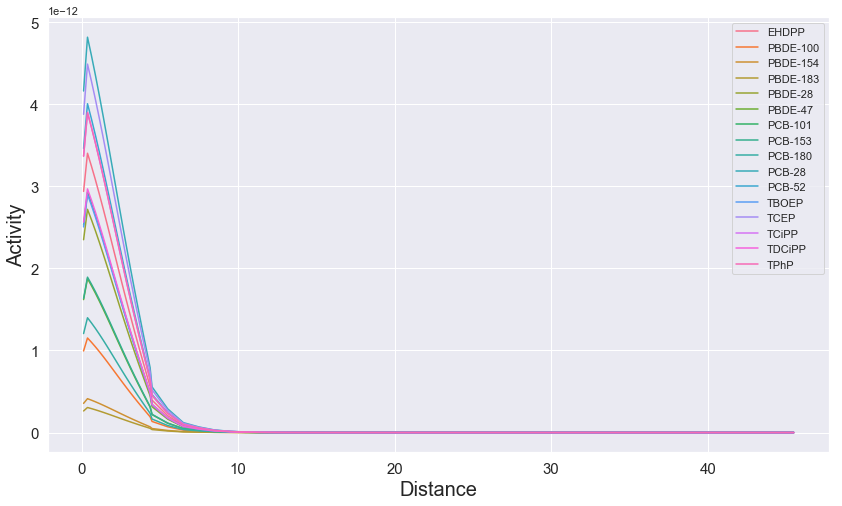

In [55]:
#Plot activity in the water compartment

#Set plotting parameters
%matplotlib inline
plttime = 5
yvar = 'a1_t1'
pltdata = res_time.loc[(plttime,slice(None),slice(None)),slice(None)] #Just at plttime
ylim = [-0.5e-11, 5e-3]
ylabel = 'Activity'
xlabel = 'Distance'
#pltdata = res_time #All times at once
fig = plt.figure(figsize=(14,8))
ax = sns.lineplot(x = 'x', y = yvar, hue = pltdata.index.get_level_values(1),data = pltdata)
#ax.set_ylim(ylim)
ax.set_ylabel(ylabel, fontsize=20)
ax.set_xlabel(xlabel, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)


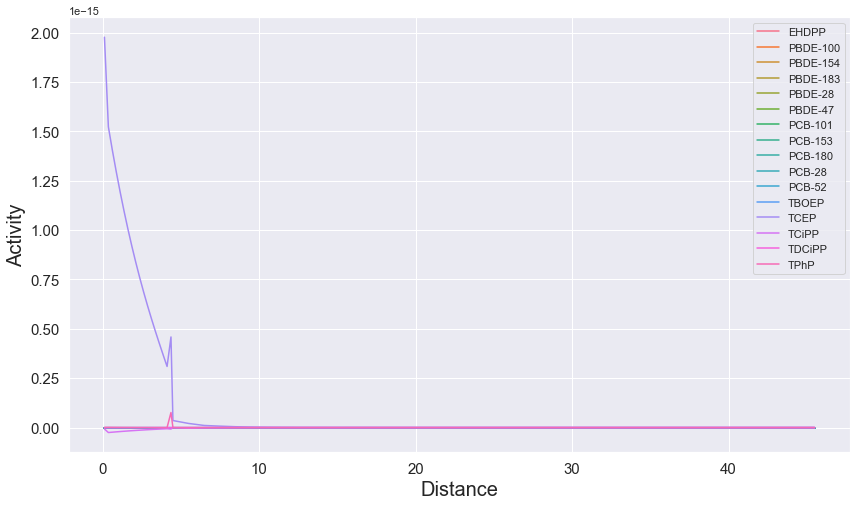

In [57]:
#Plot activity in the subsoil

#Set plotting parameters
%matplotlib inline
plttime = 15
yvar = 'a3_t1'
pltdata = res_time.loc[(plttime,slice(None),slice(None)),slice(None)] #Just at plttime
#ylim = [-0.5e-11, 5e-11]
ylabel = 'Activity'
xlabel = 'Distance'
#pltdata = res_time #All times at once
fig = plt.figure(figsize=(14,8))
ax = sns.lineplot(x = 'x', y = yvar, hue = pltdata.index.get_level_values(1),data = pltdata)
#ax.set_ylim(ylim)
ax.set_ylabel(ylabel, fontsize=20)
ax.set_xlabel(xlabel, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)


KeyError: 30

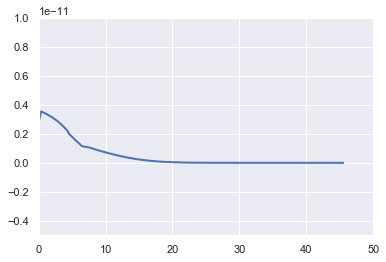

In [58]:
#Animated version of the activity in water through time for a selected compound
#Animation code adapted from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

fig, ax = plt.subplots()
#Set plotting parameters and variable
xlim = [0,50]
ylim = [-0.5e-11, 1e-11]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
yvar = 'a1_t1'
compound = 'EHDPP'
line, = ax.plot([], [], lw=2)
#Define the empty line - is this necessary?
def init():
    line.set_data([], [])
    return (line,)
#Define the animation function
def animate(i):
    x = np.array(res_time.loc[(0,compound,slice(None)),'x'])
    y = np.array(res_time.loc[(i,compound,slice(None)),yvar])
    #y1 = np.array(res_time.loc[(i,'EHDPP',slice(None)),yvar])
    line.set_data(x, y)
    #line.set_data(x, y1)
    return (line,)

#This defines the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
#Run the animation
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-64cf428e664e>", line 39, in <module>
    HTML(anim.to_html5_video())
  File "D:\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1353, in to_html5_video
    self.save(f.name, writer=writer)
  File "D:\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1200, in save
    writer.grab_frame(**savefig_kwargs)
  File "D:\Anaconda3\lib\site-packages\matplotlib\animation.py", line 385, in grab_frame
    dpi=self.dpi, **savefig_kwargs)
  File "D:\Anaconda3\lib\site-packages\matplotlib\figure.py", line 2035, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "D:\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 2263, in print_figure
    **kwargs)
  File "D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 494, in print_raw
 

KeyboardInterrupt: 

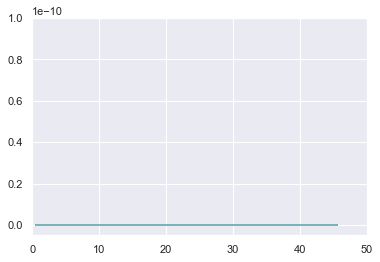

In [4]:
#Animated version of the activity through time for all compounds
#Animation code adapted from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

fig = plt.figure()
#Define number of chemicals and chemicals to plot
chems = res_time.index.get_level_values(1)
numchems = len(chems)
numframes = 30
#Set plotting parameters and variable
xlim = [0,50]
ylim = [-0.5e-11, 1e-10]
ax = plt.axes(xlim=xlim, ylim=ylim)
yvar = 'a1_t'

#Define lines  that will be plotted
lines = [plt.plot([], [])[0] for _ in range(numchems)] #lines to animate
patches = lines

#Define the init - is this necessary?
def init():
    #init lines
    for line in lines:
        line.set_data([],[])
    return patches

#Define the animation function
def animate(i):
    for j,line in enumerate(lines):
        compound = chems[j]
        x = np.array(res_time.loc[(0,compound,slice(None)),'x'])
        y = np.array(res_time.loc[(i,compound,slice(None)),yvar])
        line.set_data([x],[y])
    return patches

#This defines the animation
anim = animation.FuncAnimation(fig, animate, init_func = init,frames=numframes,interval=20, 
                               blit=True)
#Run the animation
HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

In [ ]:
#Total mass in all compartments at a time step
#mass = VZa
time = 0
res = res_t[time]
for i in range(numc)
    Mi = 'M' + str(i+1), ai = a1_t1, vi = 